In [1]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import sys
sys.path.append("..")
import scripts.database as database
import plotly_aggs
import ipas
import numpy as np
import glob
import scipy.optimize as opt
import chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

USERNAME = ''  # enter you're username
API_KEY = ''  # enter you're api_key
#chart_studio.tools.set_credentials_file(username=USERNAME, api_key=API_KEY)
chart_studio.tools.set_credentials_file(username='V_przybylo', api_key='dLMeh8k4zPW1tltWDpvp')

In [5]:
glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand*")

['/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r500_1000',
 '/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r1_5']

## Read Database

In [6]:
orientation = 'rand'  # chose which orientation (rand or flat)
if orientation == 'rand':
    rand_orient = True      #randomly orient the seed crystal and new crystal: uses first random orientation
    files = glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand*")[:2]
else:
    rand_orient = False      #randomly orient the seed crystal and new crystal: uses first random orientation
    files =  glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_flat*")

In [7]:
%%time
db = database.Database(files)
db.read_database()
db.append_shape()
db.truncate_agg_r(5000)
db.append_agg_phi()
df = db.df  # get the dataframe (db is an instance of database.py module)

reading:  /network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r500_1000
reading:  /network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r1_5
CPU times: user 23.5 s, sys: 7.06 s, total: 30.5 s
Wall time: 30.9 s


## Generate Plot in Plotly (click on output URL)

In [44]:
index = 36576  # which agg to plot
agg = df.iloc[index]

all_agg_data = []
for crystal_num in range(agg.ncrystals):  # index of monomer in agg
    agg_plt = plotly_aggs.PlotAgg(agg, crystal_num)
    agg_plt.prism_points()
    agg_plt.min_max_all_points()
    agg_plt.basal_points_bottom()
    agg_plt.basal_points_top()
    agg_plt.get_scatter_plot_data()
    # go.Scatter3d for each part of monomer for each monomer in agg
    all_agg_data.extend([agg_plt.trace_prism,
                        agg_plt.trace_basal_top,
                        agg_plt.trace_basal_bottom])

#apply to whole agg, not each individual monomer
xell, yell, zell, x, y, z = agg_plt.ellipsoid_surface()
agg_plt.scatter_ellipsoid(xell, yell, zell, x, y, z)
all_agg_data.append(agg_plt.ellipsoid_surface)
all_agg_data.append(agg_plt.ellipsoid_radius_b1)
all_agg_data.append(agg_plt.ellipsoid_radius_b2)
all_agg_data.append(agg_plt.ellipsoid_radius_r1)
all_agg_data.append(agg_plt.ellipsoid_radius_r2)
all_agg_data.append(agg_plt.ellipsoid_radius_g1)
agg_plt.camera()
agg_plt.layout()

py.iplot(all_agg_data, filename='test',
        auto_open=True, layout=agg_plt.layout)


In [46]:
index = 36718  # which agg to plot
agg = df.iloc[index]
agg_clus = ipas.cluster_calculations.ClusterCalculations(agg)

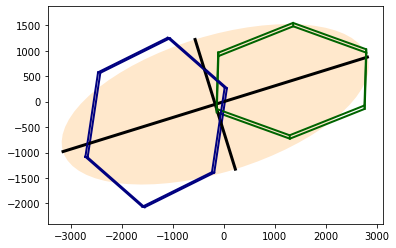

In [16]:
agg_clus.plot_ellipse([['x', 'y']])

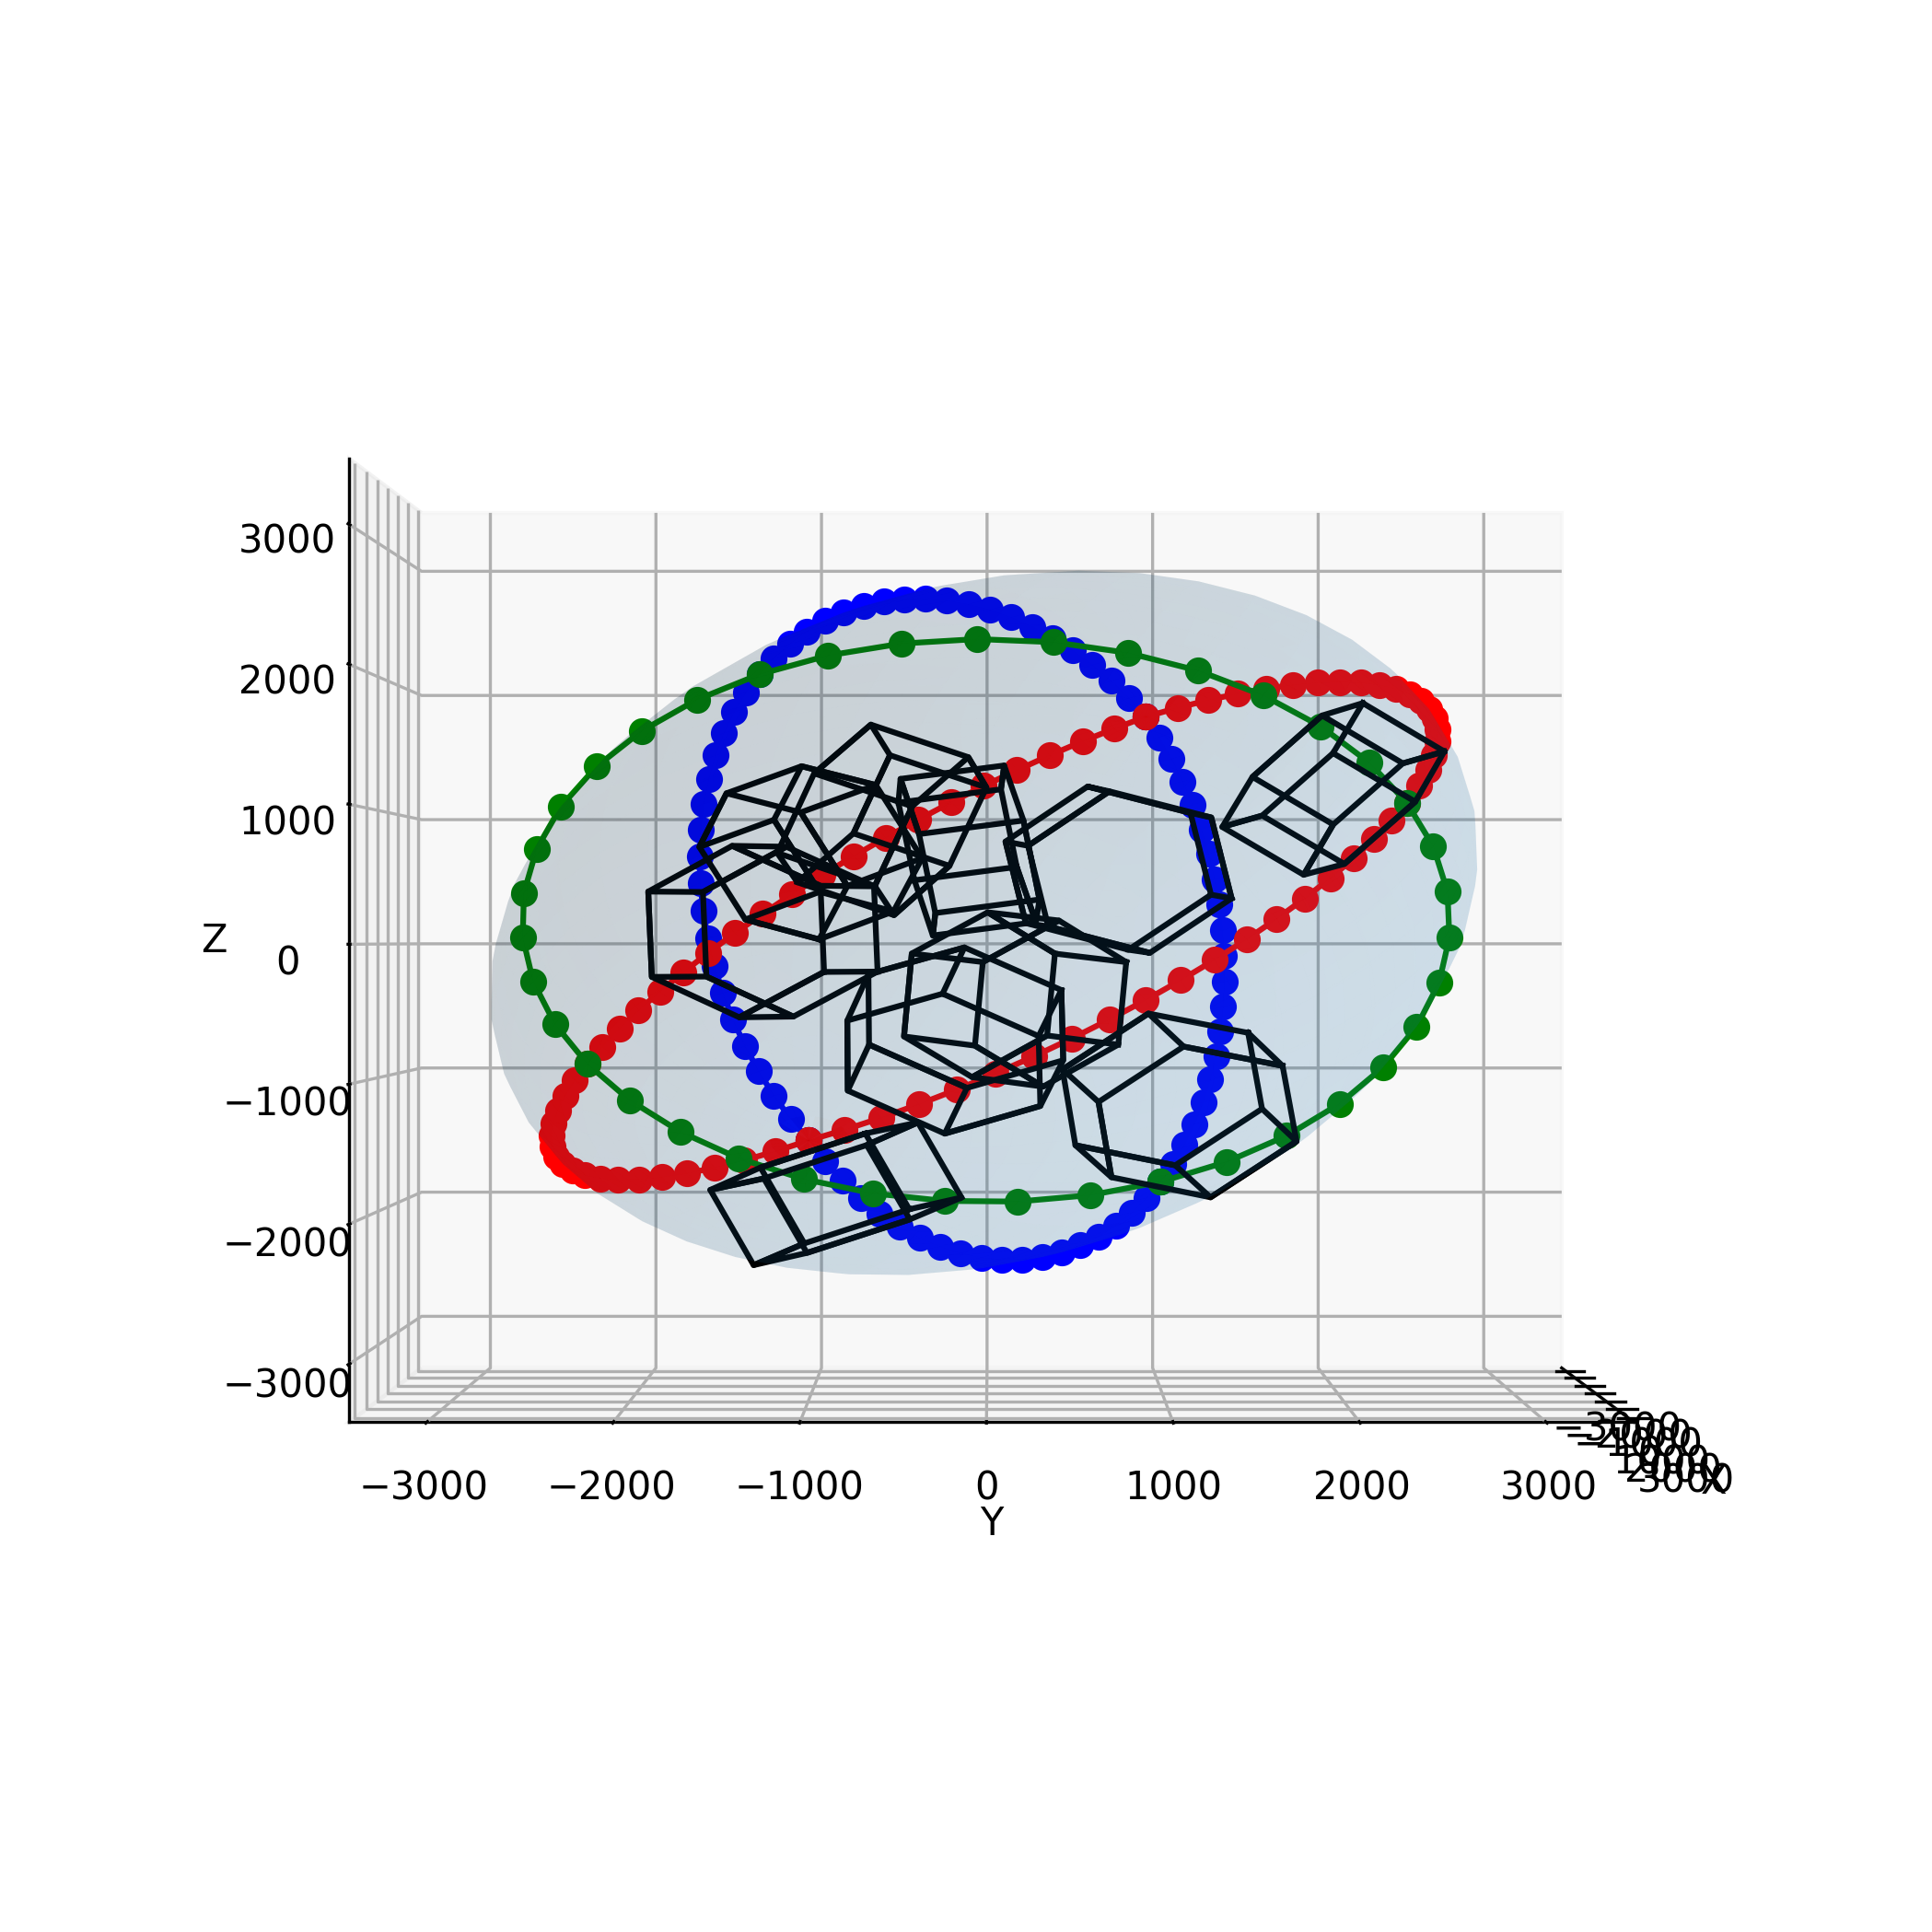

In [48]:
agg_clus.plot_ellipsoid_aggs([agg], view='y', circle=None, agg_agg=True)